In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, matthews_corrcoef, accuracy_score
from joblib import dump

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    cm = cm*100
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

In [25]:
df_sequences = pd.read_csv("../../raw_data/enzymes_plastics.csv")

df_PET = df_sequences[["sequence", "PET"]]
df_phb = df_sequences[["sequence", "PHB"]]
df_pha = df_sequences[["sequence", "PHA"]]
df_pla = df_sequences[["sequence", "PLA"]]
df_pcl = df_sequences[["sequence", "PCL"]]
df_pu_pur = df_sequences[["sequence", "PU/PUR"]]
df_nylon = df_sequences[["sequence", "NYLON/PA"]]


In [26]:
df_protrans_xlu50 = pd.read_csv("../../processed_dataset/protrans_xlu50/encoder_data.csv")
df_esm1b = pd.read_csv("../../processed_dataset/esm1b/encoder_data.csv")
df_esme = pd.read_csv("../../processed_dataset/esme/encoder_data.csv")
df_plusrnn = pd.read_csv("../../processed_dataset/plusrnn/encoder_data.csv")
df_protrans_bdf = pd.read_csv("../../processed_dataset/protrans_bdf/encoder_data.csv")
df_protrans_albert = pd.read_csv("../../processed_dataset/protrans_albert/encoder_data.csv")

### Classification model for PET

In [27]:
df_data = df_protrans_xlu50.merge(right=df_PET, on="sequence")
df_data = df_data.drop(columns=["sequence"])

df_positive = df_data[df_data["PET"] == 1]
df_negative = df_data[df_data["PET"] == 0]

df_negative = shuffle(df_negative, random_state=42, n_samples=len(df_positive))

df_process = pd.concat([df_positive, df_negative], axis=0)
df_values = df_process.drop(columns=["PET"]).values
response = df_process["PET"].values

X_train_pet, X_test_pet, y_train_pet, y_test_pet = train_test_split(df_values, response, random_state=42, test_size=0.25)

pet_model = ExtraTreesClassifier(random_state=42)
pet_model.fit(X=X_train_pet, y=y_train_pet)
pet_predictions = pet_model.predict(X_test_pet)

performances_values_PET = [
    accuracy_score(y_true=y_test_pet, y_pred=pet_predictions),
    precision_score(y_true=y_test_pet, y_pred=pet_predictions),
    recall_score(y_true=y_test_pet, y_pred=pet_predictions),
    f1_score(y_true=y_test_pet, y_pred=pet_predictions),
    matthews_corrcoef(y_true=y_test_pet, y_pred=pet_predictions)
]

dump(pet_model, "../../generated_models/PET_clf.joblib")

performances_values_PET

[0.967391304347826,
 np.float64(1.0),
 np.float64(0.9347826086956522),
 np.float64(0.9662921348314607),
 np.float64(0.9367769320431428)]

### Classification model PHA

In [28]:
df_data = df_esme.merge(right=df_pha, on="sequence")
df_data = df_data.drop(columns=["sequence"])

df_positive = df_data[df_data["PHA"] == 1]
df_negative = df_data[df_data["PHA"] == 0]

df_negative = shuffle(df_negative, random_state=42, n_samples=len(df_positive))

df_process = pd.concat([df_positive, df_negative], axis=0)
df_values = df_process.drop(columns=["PHA"]).values
response = df_process["PHA"].values

X_train_pha, X_test_pha, y_train_pha, y_test_pha = train_test_split(df_values, response, random_state=42, test_size=0.25)

pha_model = BaggingClassifier(random_state=42)
pha_model.fit(X=X_train_pha, y=y_train_pha)
pha_predictions = pha_model.predict(X_test_pha)

performances_values_pha = [
    accuracy_score(y_true=y_test_pha, y_pred=pha_predictions),
    precision_score(y_true=y_test_pha, y_pred=pha_predictions),
    recall_score(y_true=y_test_pha, y_pred=pha_predictions),
    f1_score(y_true=y_test_pha, y_pred=pha_predictions),
    matthews_corrcoef(y_true=y_test_pha, y_pred=pha_predictions)
]

dump(pha_model, "../../generated_models/PHA_clf.joblib")

performances_values_pha

[0.9285714285714286,
 np.float64(0.9375),
 np.float64(0.9375),
 np.float64(0.9375),
 np.float64(0.8541666666666666)]

### Classification model for PHB

In [29]:
df_data = df_esm1b.merge(right=df_phb, on="sequence")
df_data = df_data.drop(columns=["sequence"])

df_positive = df_data[df_data["PHB"] == 1]
df_negative = df_data[df_data["PHB"] == 0]

df_negative = shuffle(df_negative, random_state=42, n_samples=len(df_positive))

df_process = pd.concat([df_positive, df_negative], axis=0)
df_values = df_process.drop(columns=["PHB"]).values
response = df_process["PHB"].values

X_train_phb, X_test_phb, y_train_phb, y_test_phb = train_test_split(df_values, response, random_state=42, test_size=0.25)

phb_model = ExtraTreesClassifier(random_state=42)
phb_model.fit(X=X_train_phb, y=y_train_phb)
phb_predictions = phb_model.predict(X_test_phb)

performances_values_phb = [
    accuracy_score(y_true=y_test_phb, y_pred=phb_predictions),
    precision_score(y_true=y_test_phb, y_pred=phb_predictions),
    recall_score(y_true=y_test_phb, y_pred=phb_predictions),
    f1_score(y_true=y_test_phb, y_pred=phb_predictions),
    matthews_corrcoef(y_true=y_test_phb, y_pred=phb_predictions)
]

dump(phb_model, "../../generated_models/PHB_clf.joblib")

performances_values_phb

[0.8857142857142857,
 np.float64(1.0),
 np.float64(0.7777777777777778),
 np.float64(0.875),
 np.float64(0.7934920476158722)]

### Classification model for PLA

In [30]:
df_data = df_plusrnn.merge(right=df_pla, on="sequence")
df_data = df_data.drop(columns=["sequence"])

df_positive = df_data[df_data["PLA"] == 1]
df_negative = df_data[df_data["PLA"] == 0]

df_negative = shuffle(df_negative, random_state=42, n_samples=len(df_positive))

df_process = pd.concat([df_positive, df_negative], axis=0)
df_values = df_process.drop(columns=["PLA"]).values
response = df_process["PLA"].values

X_train_pla, X_test_pla, y_train_pla, y_test_pla = train_test_split(df_values, response, random_state=42, test_size=0.25)

pla_model = HistGradientBoostingClassifier(random_state=42)
pla_model.fit(X=X_train_pla, y=y_train_pla)
pla_predictions = pla_model.predict(X_test_pla)

performances_values_pla = [
    accuracy_score(y_true=y_test_pla, y_pred=pla_predictions),
    precision_score(y_true=y_test_pla, y_pred=pla_predictions),
    recall_score(y_true=y_test_pla, y_pred=pla_predictions),
    f1_score(y_true=y_test_pla, y_pred=pla_predictions),
    matthews_corrcoef(y_true=y_test_pla, y_pred=pla_predictions)
]

dump(pla_model, "../../generated_models/PLA_clf.joblib")

performances_values_pla

[0.7777777777777778,
 np.float64(0.7368421052631579),
 np.float64(0.9333333333333333),
 np.float64(0.8235294117647058),
 np.float64(0.5622440938352591)]

### Classification model for PCL

In [31]:
df_data = df_protrans_bdf.merge(right=df_pcl, on="sequence")
df_data = df_data.drop(columns=["sequence"])

df_positive = df_data[df_data["PCL"] == 1]
df_negative = df_data[df_data["PCL"] == 0]

df_negative = shuffle(df_negative, random_state=42, n_samples=len(df_positive))

df_process = pd.concat([df_positive, df_negative], axis=0)
df_values = df_process.drop(columns=["PCL"]).values
response = df_process["PCL"].values

X_train_pcl, X_test_pcl, y_train_pcl, y_test_pcl = train_test_split(df_values, response, random_state=42, test_size=0.25)

pcl_model = RandomForestClassifier(random_state=42)
pcl_model.fit(X=X_train_pcl, y=y_train_pcl)
pcl_predictions = pcl_model.predict(X_test_pcl)

performances_values_pcl = [
    accuracy_score(y_true=y_test_pcl, y_pred=pcl_predictions),
    precision_score(y_true=y_test_pcl, y_pred=pcl_predictions),
    recall_score(y_true=y_test_pcl, y_pred=pcl_predictions),
    f1_score(y_true=y_test_pcl, y_pred=pcl_predictions),
    matthews_corrcoef(y_true=y_test_pcl, y_pred=pcl_predictions)
]

dump(pcl_model, "../../generated_models/PCL_clf.joblib")

performances_values_pcl

[0.84,
 np.float64(1.0),
 np.float64(0.7142857142857143),
 np.float64(0.8333333333333334),
 np.float64(0.7237468644557459)]

### Classification model for PU/PUR

In [45]:
df_data = df_protrans_albert.merge(right=df_pu_pur, on="sequence")
df_data = df_data.drop(columns=["sequence"])


df_positive = df_data[df_data["PU/PUR"] == 1]
df_negative = df_data[df_data["PU/PUR"] == 0]

df_negative = shuffle(df_negative, random_state=42, n_samples=len(df_positive))

df_process = pd.concat([df_positive, df_negative], axis=0)
df_values = df_process.drop(columns=["PU/PUR"]).values
response = df_process["PU/PUR"].values

X_train_pu_pur, X_test_pu_pur, y_train_pu_pur, y_test_pu_pur = train_test_split(df_values, response, random_state=42, test_size=0.25)

pu_pur_model = RandomForestClassifier(random_state=42)
pu_pur_model.fit(X=X_train_pu_pur, y=y_train_pu_pur)
pu_pur_predictions = pu_pur_model.predict(X_test_pu_pur)

performances_values_pu_pur = [
    accuracy_score(y_true=y_test_pu_pur, y_pred=pu_pur_predictions),
    precision_score(y_true=y_test_pu_pur, y_pred=pu_pur_predictions),
    recall_score(y_true=y_test_pu_pur, y_pred=pu_pur_predictions),
    f1_score(y_true=y_test_pu_pur, y_pred=pu_pur_predictions),
    matthews_corrcoef(y_true=y_test_pu_pur, y_pred=pu_pur_predictions)
]

dump(pu_pur_model, "../../generated_models/PU_PUR_clf.joblib")

performances_values_pu_pur

[0.8695652173913043,
 np.float64(0.8571428571428571),
 np.float64(0.9230769230769231),
 np.float64(0.8888888888888888),
 np.float64(0.7344646618036428)]

### Classification model for Nylon

In [40]:
df_data = df_esme.merge(right=df_nylon, on="sequence")
df_data = df_data.drop(columns=["sequence"])


df_positive = df_data[df_data["NYLON/PA"] == 1]
df_negative = df_data[df_data["NYLON/PA"] == 0]

df_negative = shuffle(df_negative, random_state=42, n_samples=len(df_positive))

df_process = pd.concat([df_positive, df_negative], axis=0)
df_values = df_process.drop(columns=["NYLON/PA"]).values
response = df_process["NYLON/PA"].values

X_train_nylon, X_test_nylon, y_train_nylon, y_test_nylon = train_test_split(df_values, response, random_state=42, test_size=0.25)

nylon_model = RandomForestClassifier(random_state=42)
nylon_model.fit(X=X_train_nylon, y=y_train_nylon)
nylon_predictions = nylon_model.predict(X_test_nylon)

performances_values_nylon = [
    accuracy_score(y_true=y_test_nylon, y_pred=nylon_predictions),
    precision_score(y_true=y_test_nylon, y_pred=nylon_predictions),
    recall_score(y_true=y_test_nylon, y_pred=nylon_predictions),
    f1_score(y_true=y_test_nylon, y_pred=nylon_predictions),
    matthews_corrcoef(y_true=y_test_nylon, y_pred=nylon_predictions)
]

dump(nylon_model, "../../generated_models/NYLON_PA_clf.joblib")

performances_values_nylon

[0.9545454545454546,
 np.float64(0.9),
 np.float64(1.0),
 np.float64(0.9473684210526315),
 np.float64(0.9114654303752999)]

In [51]:
predict_proba_pet = pet_model.predict_proba(X_test_pet)[:, 1]
predict_proba_pla = pla_model.predict_proba(X_test_pla)[:, 1]
predict_proba_pha = pha_model.predict_proba(X_test_pha)[:, 1]
predict_proba_phb = phb_model.predict_proba(X_test_phb)[:, 1]
predict_proba_pcl = pcl_model.predict_proba(X_test_pcl)[:, 1]
predict_proba_nylon = nylon_model.predict_proba(X_test_nylon)[:, 1]
predict_proba_pur = pu_pur_model.predict_proba(X_test_pu_pur)[:, 1]

In [54]:
predict_proba_pet

array([0.14, 0.9 , 0.66, 0.3 , 1.  , 0.03, 0.96, 0.98, 0.93, 0.99, 0.  ,
       1.  , 0.22, 1.  , 0.6 , 0.  , 0.96, 0.06, 0.37, 0.74, 0.97, 0.99,
       0.98, 0.34, 0.  , 0.06, 0.  , 0.2 , 0.29, 0.38, 0.39, 1.  , 1.  ,
       0.09, 0.  , 1.  , 0.97, 0.92, 0.04, 0.  , 0.  , 0.02, 0.99, 0.35,
       1.  , 0.  , 0.98, 1.  , 0.99, 1.  , 0.01, 0.1 , 0.23, 0.22, 1.  ,
       0.01, 0.47, 0.97, 0.13, 0.73, 0.  , 0.  , 0.66, 1.  , 0.  , 0.99,
       0.  , 0.97, 0.09, 1.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.15, 0.94,
       0.99, 0.06, 0.91, 0.98, 0.01, 0.61, 1.  , 0.97, 0.  , 0.12, 0.34,
       0.06, 0.98, 0.  , 0.99])

Optimal Cut-off PET: 0.39
Optimal Cut-off PLA: 0.7855690276444242
Optimal Cut-off PHA: 0.8
Optimal Cut-off PHB: 0.41
Optimal Cut-off PCL: 0.56
Optimal Cut-off PU/PUR: 0.64
Optimal Cut-off PA/NYLON: 0.79


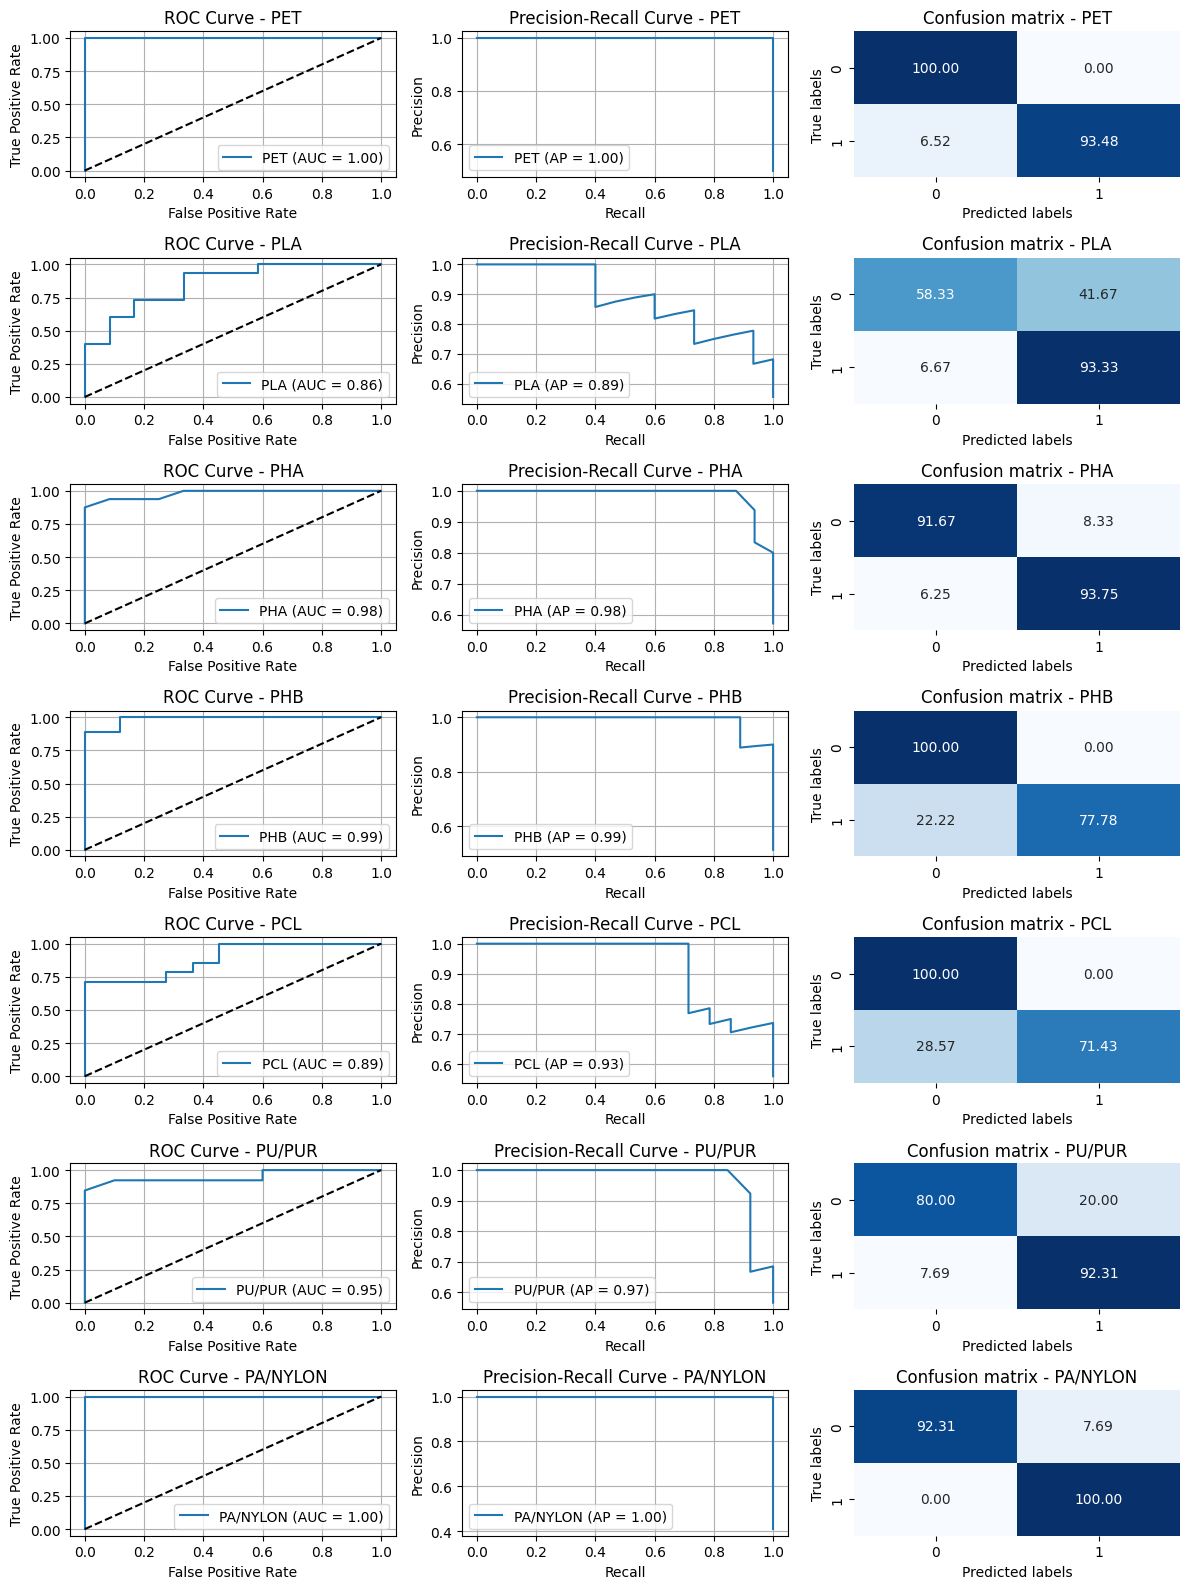

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix

# Configuración de subplots para ROC, Precision-Recall, y Matriz de Confusión
fig, axs = plt.subplots(7, 3, figsize=(12, 16))

# ROC y Precision-Recall para cada tarea
for i, (y_test, y_pred_proba, y_pred, model_name) in enumerate(
    [(y_test_pet, predict_proba_pet, pet_predictions, "PET"),
     (y_test_pla, predict_proba_pla, pla_predictions, "PLA"),
     (y_test_pha, predict_proba_pha, pha_predictions, "PHA"),
     (y_test_phb, predict_proba_phb, phb_predictions, "PHB"),
     (y_test_pcl, predict_proba_pcl, pcl_predictions, "PCL"),
     (y_test_pu_pur, predict_proba_pur, pu_pur_predictions, "PU/PUR"),
     (y_test_nylon, predict_proba_nylon, nylon_predictions, "PA/NYLON")]):

    fpr, tpr, threshold_values = roc_curve(y_test, y_pred_proba)
    youden_index = tpr - fpr
    optimal_cutoff = threshold_values[youden_index.argmax()]

    print(f"Optimal Cut-off {model_name}: {optimal_cutoff}")

    roc_auc = auc(fpr, tpr)
    axs[i, 0].plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    axs[i, 0].plot([0, 1], [0, 1], 'k--')
    axs[i, 0].set_xlabel('False Positive Rate')
    axs[i, 0].set_ylabel('True Positive Rate')
    axs[i, 0].set_title(f'ROC Curve - {model_name}')
    axs[i, 0].legend(loc="lower right")
    axs[i, 0].grid()

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap = average_precision_score(y_test, y_pred_proba)
    axs[i, 1].plot(recall, precision, label=f'{model_name} (AP = {ap:.2f})')
    axs[i, 1].set_xlabel('Recall')
    axs[i, 1].set_ylabel('Precision')
    axs[i, 1].set_title(f'Precision-Recall Curve - {model_name}')
    axs[i, 1].legend(loc="lower left")
    axs[i, 1].grid()

    plot_confusion_matrix(axs[i, 2], y_test, y_pred, f'Confusion matrix - {model_name}')

plt.tight_layout()

plt.savefig("../../figures_paper/models_description.png", dpi=300)
